# Optimal solution for the N×N×N Rubik's Cube

<img src="https://w7.pngwing.com/pngs/754/347/png-transparent-3-by-3-rubik-s-cube-rubiks-cube-professors-cube-rubik-039-s-cube-symmetry-cube-toy-thumbnail.png"/>

## Defining all possible moves

<img src="https://uploads-ssl.webflow.com/621fc3d35d2503efbb52fe84/621fc3d35d25030ff3530054_twisting.jpeg"/>

For 3x3 Rubik's Cube:
* R - right side up,
* Ri - right side down,
* L - left side down,
* Li - left side up,
* B - back side left,
* Bi - back side right,
* F - front side right,
* Fi - front side left,
* D - bottom side right,
* Di - bottom side left,
* U - top side left,
* Ui - top side right

So in total we can make 12 moves for 3x3x3 rubik's cube.


## Experiments for 3x3x3 rubik's cube

We will perform some experiments to determine the best way to *make Rubik's cube moves* but in code

### Color codes
* 1 - white
* 2 - yellow
* 3 - red
* 4 - orange
* 5 - blue
* 6 - green

In [170]:
# Define a list of possible moves
moves = ["U", "U'", "D", "D'", "R", "R'", "L", "L'", "F", "F'", "B", "B'"]

In [171]:
import numpy as np

def initialize_cube():
  cube = np.zeros((6, 3, 3), dtype=np.int8)

  # Front face - green
  cube[0] = np.full((3, 3), 1)

  # Back face - blue
  cube[1] = np.full((3, 3), 2)

  # Left face - red
  cube[2] = np.full((3, 3), 3)

  # Right face - orange
  cube[3] = np.full((3, 3), 4)

  # Top face - yellow
  cube[4] = np.full((3, 3), 5)

  # Bottom face - white
  cube[5] = np.full((3, 3), 6)

  return cube

In [172]:
import matplotlib.pyplot as plt

# Define the colors of each face of the Rubik's Cube
colors = ['green', 'blue', 'red', 'orange', 'yellow', 'white']

cube_sides = {"front": 0, 
              "back": 1, 
              "left": 2, 
              "right": 3, 
              "top": 4, 
              "bottom": 5}

colour_palette = {
    'blue': [0, 0, 255],
    'green': [0, 255, 0],  # green
    'red': [255, 0, 0],  # red
    'orange': [255, 153, 51],  # orange
    'white': [255, 255, 255],  # white
    'yellow': [255, 255, 0],  # yellow
}

# Front face cube[0]
# Back face  cube[1]
# Left face cube[2]
# Right face cube[3]
# Top face cube[4]
# Bottom face cube[5]

def plot_cube_side(cube, sides, axes):
  if len(sides) == 1:
    axes.set_title(sides[0])

    x = np.arange(0, 3)
    y = np.arange(0, 3)
    xx, yy = np.meshgrid(x, y)

    # Draw the vertical and horizontal lines of the mesh
    axes.hlines(y + 0.5, xmin=-0.5, xmax=2.5, color='black', linewidth=1)
    axes.vlines(x + 0.5, ymin=-0.5, ymax=2.5, color='black', linewidth=1)
    
    # Convert the numpy array for the current face to a list of colors
    side = np.array([])
    for row in range(3):
        for col in range(3):
            colour = colour_palette[colors[cube[cube_sides[sides[0]]][row][col] - 1]]
            side = np.append(side, colour)
    
    # Reshape the list of colors into a 3x3 grid and plot it
    axes.imshow(side.reshape(3, 3, 3) / 255.)

    # Hide the axis ticks and labels
    axes.set_xticks([])
    axes.set_yticks([])
  else:
    for i, ax in enumerate(axes):
      # Set the title of the subplot to the name of the corresponding face
      ax.set_title(sides[i])

      x = np.arange(0, 3)
      y = np.arange(0, 3)
      xx, yy = np.meshgrid(x, y)

      # Draw the vertical and horizontal lines of the mesh
      ax.hlines(y + 0.5, xmin=-0.5, xmax=2.5, color='black', linewidth=1)
      ax.vlines(x + 0.5, ymin=-0.5, ymax=2.5, color='black', linewidth=1)
      
      # Convert the numpy array for the current face to a list of colors
      side = np.array([])
      for row in range(3):
          for col in range(3):
              colour = colour_palette[colors[cube[cube_sides[sides[i]]][row][col] - 1]]
              side = np.append(side, colour)
      
      # Reshape the list of colors into a 3x3 grid and plot it using a heatmap
      ax.imshow(side.reshape(3, 3, 3) / 255.)

      # Hide the axis ticks and labels
      ax.set_xticks([])
      ax.set_yticks([])


In [173]:
cube = initialize_cube()

In [174]:
def plot_cube(cube, size=3):
  fig, axes = plt.subplots(nrows=4, ncols=size, figsize=(6, 8))
  plot_cube_side(cube, ['top'], axes=axes[0, 1])
  plot_cube_side(cube, ['left', 'front', 'right'], axes=axes[1])
  plot_cube_side(cube, ['bottom'], axes=axes[2, 1])
  plot_cube_side(cube, ['back'], axes=axes[3, 1])

  axes[0, 0].set_axis_off()
  axes[0, 2].set_axis_off()
  axes[2, 0].set_axis_off()
  axes[2, 2].set_axis_off()
  axes[3, 0].set_axis_off()
  axes[3, 2].set_axis_off()

  plt.show();

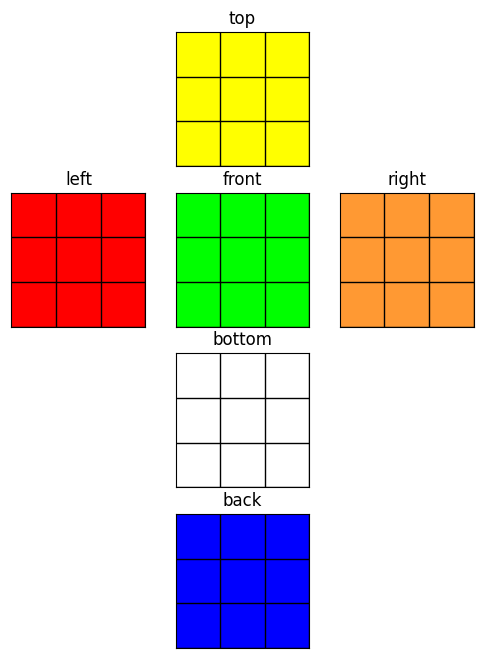

In [175]:
plot_cube(cube)

In [176]:
# Front face cube[0]
# Back face  cube[1]
# Left face cube[2]
# Right face cube[3]
# Top face cube[4]
# Bottom face cube[5]

In [177]:
cube = initialize_cube()

In [178]:
def make_move(cube, move):
  if move == "F":
    cube[0] = np.rot90(cube[0], k=-1) # rotate front face clockwise
    tmp = np.copy(cube[4, -1]) # last top row
    cube[4, -1] = cube[2, :, -1] # change last top row to last left column
    cube[2, :, -1] = cube[5, 0] # change last left column to first bottom row
    cube[5, 0] = cube[3, :, 0] # change first bottom row to first right column
    cube[3, :, 0] = tmp # change first right column to top last row
  elif move == "F'":
    cube[0] = np.rot90(cube[0], k=1) # rotate front face counter clockwise
    tmp = np.copy(cube[4, -1]) # last top row
    cube[4, -1] = cube[3, :, 0] # change last top row to first right column
    cube[3, :, 0] = cube[5, 0] # change first right column to first bottom row
    cube[5, 0] = cube[2, :, -1] # change first bottom row to last left column
    cube[2, :, -1] = tmp # change last left column to top last row
  elif move == "D'":
    cube[5] = np.rot90(cube[5], k=1) # rotate bottom face counter clockwise
    tmp = np.copy(cube[0, -1]) # last front row
    cube[0, -1] = cube[2, -1] # last front row to last left row
    cube[2, -1] = cube[1, -1] # last left row to last back row
    cube[1, -1] = cube[3, -1] # last back row to last right row
    cube[3, -1] = tmp # last right row to last front row
  elif move == "D":
    cube[5] = np.rot90(cube[5], k=-1) # rotate bottom face clockwise
    tmp = np.copy(cube[0, -1]) # last front row
    cube[0, -1] = cube[3, -1] # last front row to last right row
    cube[3, -1] = cube[1, -1] # last right row to last back row
    cube[1, -1] = cube[2, -1] # last back row to last left row
    cube[2, -1] = tmp # last left row to last front row
  elif move == "U":
    cube[4] = np.rot90(cube[4], k=-1)# rotate top face clockwise
    tmp = np.copy(cube[0, 0]) # top front row
    cube[0, 0] = cube[2, 0] # first front row to first left row
    cube[2, 0] = cube[1, 0] # first left row to first back row
    cube[1, 0] = cube[3, 0] # first back row to first right row
    cube[3, 0] = tmp # first right row to first front row
  elif move == "U'":
    cube[4] = np.rot90(cube[4], k=1)# rotate top face counter clockwise
    tmp = np.copy(cube[0, 0]) # top front row
    cube[0, 0] = cube[3, 0] # first front row to first right row
    cube[3, 0] = cube[1, 0] # first right row to first back row
    cube[1, 0] = cube[2, 0] # first back row to first left row
    cube[2, 0] = tmp # first left row to first front row
  elif move == "B":
    cube[1] = np.rot90(cube[1], k=-1)# rotate back face clockwise
    tmp = np.copy(cube[4, 0]) # first top row
    cube[4, 0] = cube[2, :, 0] # first top row to first left column
    cube[2, :, 0] = cube[5, -1] # first left column to last bottom row
    cube[5, -1] = cube[3, :, -1] # last bottom row to last right column
    cube[3, :, -1] = tmp # last right column to first top row
  elif move == "B'":
    cube[1] = np.rot90(cube[1], k=1)# rotate back face counter clockwise
    tmp = np.copy(cube[4, 0]) # first top row
    cube[4, 0] = cube[3, :, -1] # first top row to last right column
    cube[3, :, -1] = cube[5, -1] # last right column to last bottom row
    cube[5, -1] = cube[2, :, 0] # last bottom row to first left column
    cube[2, :, 0] = tmp # first left column to first top row
  elif move == "R":
    cube[3] = np.rot90(cube[3], k=-1) # rotate right face clockwise
    tmp = np.copy(cube[4, :, -1]) # last top column
    cube[4, :, -1] = cube[0, :, -1] # last top column to last front column
    cube[0, :, -1] = cube[5, :, -1] # last front column to last bottom column
    cube[5, :, -1] = cube[1, :, -1] # last bottom column to last back column
    cube[1, :, -1] = tmp # last back column to last top column
  elif move == "R'":
    cube[3] = np.rot90(cube[3], k=1) # rotate right face counter clockwise
    tmp = np.copy(cube[4, :, -1]) # last top column
    cube[4, :, -1] = cube[1, :, -1] # last top column to last back column
    cube[1, :, -1] = cube[5, :, -1] # last back column to last bottom column
    cube[5, :, -1] = cube[0, :, -1] # last bottom column to last front column
    cube[0, :, -1] = tmp # last front column to last back column
  elif move == "L":
    cube[2] = np.rot90(cube[2], k=-1) # rotate left face clockwise
    tmp = np.copy(cube[4, :, 0]) # first top column
    cube[4, :, 0] = cube[1, :, 0] # first top column to first back column
    cube[1, :, 0] = cube[5, :, 0] # first back column to first bottom column
    cube[5, :, 0] = cube[0, :, 0] # first bottom column to first front column
    cube[0, :, 0] = tmp # first front column to first top column
  elif move == "L'":
    cube[2] = np.rot90(cube[2], k=1) # rotate left face counter clockwise
    tmp = np.copy(cube[4, :, 0]) # first top column
    cube[4, :, 0] = cube[0, :, 0] # first top column to first front column
    cube[0, :, 0] = cube[5, :, 0] # first front column to first bottom column
    cube[5, :, 0] = cube[1, :, 0] # first bottom column to first back column
    cube[1, :, 0] = tmp # first back column to first top column

  return cube

In [179]:
moves = np.array(["U", "U'", "D", "D'", "R", "R'", "L", "L'", "F", "F'", "B", "B'"])

def shuffle_cube(n_moves, cube):
  commited_moves = []

  for i in range(n_moves):
    move = np.random.choice(moves)
    commited_moves.append(move)
    cube = make_move(cube, move)

  return commited_moves

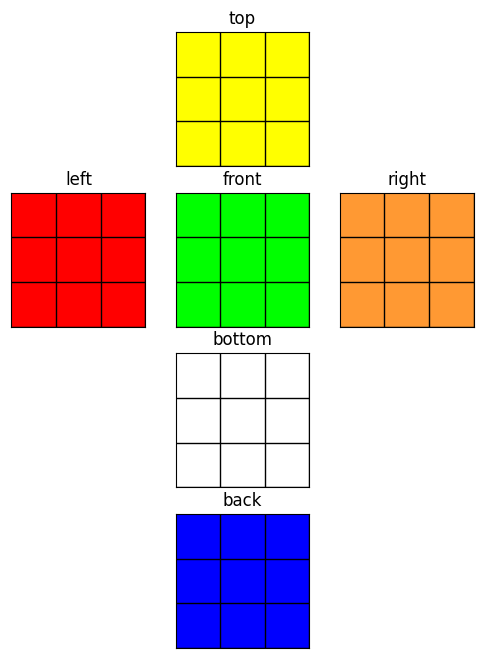

In [180]:
cube = initialize_cube()
plot_cube(cube)

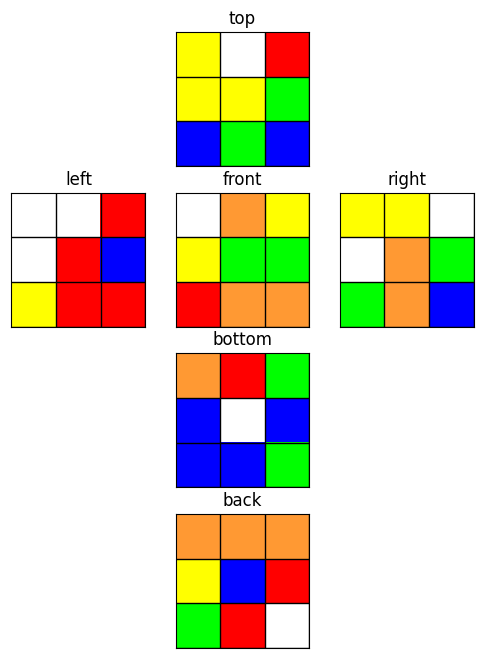

['L', "U'", "U'", 'U', "F'", 'U', 'U', "R'", 'D', "R'", 'B', "F'", 'D', 'B', "F'", 'B', "D'", 'L', "U'", "D'"]


In [181]:
commited_moves = shuffle_cube(20, cube)
plot_cube(cube)
print(commited_moves)

In [181]:
# 'L', 
# "U'", 
# "U'", 
# 'U', 
# "F'", 
# 'U', 
# 'U', 
# "R'", 
# 'D', 
# "R'", 
# 'B', 
# "F'", 
# 'D', 
# 'B', 
# "F'", 
# 'B', 
# "D'", 
# 'L', 
# "U'", 
# "D'"

<img src="https://uploads-ssl.webflow.com/621fc3d35d2503efbb52fe84/621fc3d35d25030ff3530054_twisting.jpeg"/>